<a href="https://colab.research.google.com/github/LauraMattosc/Llama2/blob/main/WebSummit2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install selenium webdriver-manager

In [26]:
import requests

# Define the URL, headers, and data
url = 'https://rio.websummit.com/api/list/?slug=schedule&typename=DefaultTemplate_Custompage_FlexibleContent_ScheduleList&page=1'
headers = {
  'sec-ch-ua': '"Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"',
  'Referer': 'https://rio.websummit.com/schedule/',
  'sec-ch-ua-mobile': '?0',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
  'sec-ch-ua-platform': '"Windows"'
}

# Send the GET request and capture the response
response = requests.get(url, headers=headers)

# Check for successful response
if response.status_code == 200:
  # Parse the JSON response (assuming it's JSON)
  data = response.json()
  # Process the data here (e.g., print, store in variables)
  print(data)
else:
  print(f"Error: {response.status_code}")


{'data': {'__typename': 'DefaultTemplate_Custompage_FlexibleContent_ScheduleList', 'hitsPerPage': 25, 'maximumPages': 25, 'scheduleDates': {'__typename': 'DefaultTemplate_Custompage_FlexibleContent_ScheduleList_ScheduleDates', 'scheduleFrom': '2024-04-15', 'scheduleTo': '2024-04-18'}, 'searchHint': 'Search...', 'isFilters': True, 'options': {'pageNum': 1, 'country': '', 'search': '', 'filters': '', 'dateFilter': ''}, 'listItems': [{'id': '974ce0aa-6ed5-4829-a110-fa18743c5706', 'slug': 'registration-at-capsula-centro-de-inovacao-senac-rj', 'title': 'Registration at Cápsula – Centro de Inovação Senac RJ', 'description': 'Register at Cápsula – Centro de Inovação Senac RJ to receive your accreditation. Your lanyard and wristband are your passport to Web Summit Rio, so collect them early.\r\n\r\nYou will find your ticket in the Web Summit Rio mobile app. Your ticket is in the form of a QR code, which will be scanned at registration. You must show your ticket in the app to register and colle

In [ ]:
pip install pandas matplotlib requests tabulate seaborn

In [116]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

def fetch_data():
    base_url = 'https://rio.websummit.com/api/list/?slug=schedule&typename=DefaultTemplate_Custompage_FlexibleContent_ScheduleList'
    headers = {
        'sec-ch-ua': '"Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"',
        'Referer': 'https://rio.websummit.com/schedule/',
        'sec-ch-ua-mobile': '?0',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
        'sec-ch-ua-platform': '"Windows"'
    }

    # Initialize a list to store all items from all pages
    all_items = []

    # Start from page 1 and increment until no more data is returned
    page = 1
    while True:
        response = requests.get(f"{base_url}&page={page}", headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch data: {response.status_code}")
            break

        data = response.json()
        items = data['data']['listItems']
        if not items:
            break

        all_items.extend(items)
        page += 1

    return all_items

In [115]:
from IPython.display import Image, display

# URL to the image
image_url = 'https://www.rj.senac.br/wp-content/uploads/2024/04/web-summit-rio-2024-em-parceria-com-o-senac-evento-volta-ao-rio-de-janeiro-2.png'

# Display the image
display(Image(url=image_url))


<ipython-input-117-8406a0a2f765>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




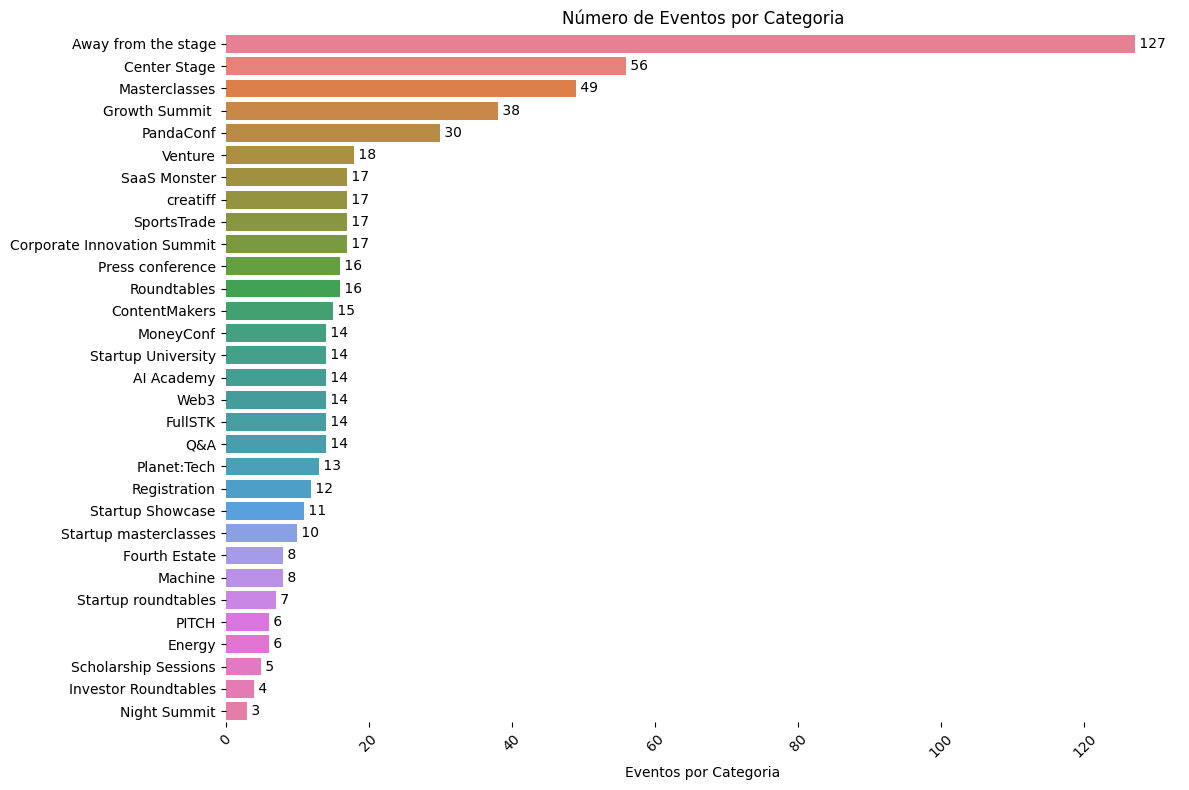

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and it contains a 'Category' column.
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Events']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a list of distinct colors equal to the number of unique categories
palette = sns.color_palette("husl", len(category_counts))

# Plot the number of events with different colors for each category
sns.barplot(x="Number of Events", y="Category", data=category_counts,
            palette=palette)

# Add labels to each bar
for index, value in enumerate(category_counts['Number of Events']):
    plt.text(value, index, f' {value}', va='center')

# Remove the borders
sns.despine(left=True, bottom=True)

# Adjust x-axis and y-axis labels (if you have long category names, consider rotating them for readability)
ax.set(ylabel=None, xlabel="Eventos por Categoria")
plt.xticks(rotation=45)
plt.title('Número de Eventos por Categoria')

# Display the plot
plt.tight_layout()
plt.show()

In [109]:
df

,Date,Event Title,Location,Category,Description
0,April 13,Registration at Cápsula – Centro de Inovação S...,Cápsula – Centro de Inovação Senac RJ,Registration,Register at Cápsula – Centro de Inovação Senac...
1,April 13,Registration at RIOgaleão Tom Jobim Internatio...,RIOgaleão Tom Jobim International Airport,Registration,Register at RIOgaleão Tom Jobim International ...
2,April 13,Registration at Jockey Club Brasileiro (In the...,Jockey Club Brasileiro - Gávea,Registration,Register at Jockey Club Brasileiro (in the Sou...
3,April 14,Registration at RIOgaleão Tom Jobim Internatio...,RIOgaleão Tom Jobim International Airport,Registration,Register at RIOgaleão Tom Jobim International ...
4,April 14,Registration at Cápsula – Centro de Inovação S...,Cápsula – Centro de Inovação Senac RJ,Registration,Register at Cápsula – Centro de Inovação Senac...
...,...,...,...,...,...
605,April 18,The secret to building a superapp,Stage 4,Startup University,Rappi Brazil CEO Felipe Criniti unveils the ke...
606,April 18,An exchange of views,Stage 3,Web3,Exchanges are the most public-facing companies...
607,April 18,How creativity impacts social development,Stage 6,creatiff,"Join PretaHub founder and CEO Adriana Barbosa,..."
608,April 18,ID Magalu: Converting traffic into loyal custo...,Magalu Cloud stand | E421,Away from the stage,Join this session to learn how single sign-on ...
